# **YOLOv8 for Object Detection in Bone Fracture Detection**

**YOLOv8** (You Only Look Once version 8) is one of the latest advancements in the **YOLO** (You Only Look Once) series of models, specifically designed for **real-time object detection**. YOLO models are widely recognized for their speed and accuracy in detecting objects within images, making them an ideal choice for various computer vision tasks.

---

## **Advantages of YOLOv8**
- **⚡ Speed and Efficiency**: YOLOv8 processes images faster compared to older models, enabling real-time inference and detection.
- **🧠 Accuracy**: It provides highly accurate results even with smaller datasets or in scenarios with many object classes.
- **🔍 Multi-scale Detection**: YOLOv8 can detect objects at different scales, which is particularly useful when dealing with objects of varying sizes (like different bone fractures).
- **🛠️ Versatility**: It can be trained for **detection**, **segmentation**, or **pose estimation** tasks.
  
---

## **Limitations of YOLOv8**
- **💾 Requires Large Datasets**: YOLOv8 requires a substantial amount of labeled data to achieve optimal performance. Small or imbalanced datasets may result in poor generalization.
- **⚖️ Computationally Intensive**: Although faster than many models, it still requires considerable computational resources (GPU) for training.
- **⚡ Limited Fine-tuning Options**: While pre-trained models provide excellent generalization, some domains may require extensive fine-tuning to match specific object types.

---

## **What YOLOv8 Does in This Project**

In this project, YOLOv8 is used to detect and classify bone fractures in **X-ray images**. The key functionality includes:

- **🖼️ Image Preprocessing**: YOLOv8 processes images from the dataset that contain bone fractures.
- **🏥 Object Detection**: It identifies different types of bone fractures like **elbow fractures**, **wrist fractures**, **shoulder fractures**, etc., in X-ray images.
- **🔢 Classification**: Each detected object is classified into one of 7 categories such as `elbow positive`, `fingers positive`, etc.

---

## **Usage in the Current Project**
- **Data Preparation**: YOLOv8 is trained on a dataset of images, with corresponding `.txt` files for each image containing **bounding box coordinates** and **class labels** for bone fractures.
- **Training the Model**: Using transfer learning and fine-tuning on the dataset, YOLOv8 can achieve **high accuracy** for object detection tasks on bone fractures.
- **Evaluation**: The model is evaluated using **mAP** (mean Average Precision), providing a metric to measure how well the model performs across different classes of bone fractures.

---

## **Visualizing Results** 

- **📊 Accuracy Monitoring**: During training, the accuracy and loss curves are tracked using **TensorBoard**, allowing for easy visualization of training progress.
- **🔍 Object Detection Results**: After training, YOLOv8's detection performance is visualized on **test images** where detected bounding boxes and predicted class labels are shown.

---

## **Conclusion**

YOLOv8 is a powerful tool for real-time object detection in medical imaging. With its speed, accuracy, and ease of use, it is well-suited for detecting **bone fractures** in X-ray images. Despite some limitations, it offers great potential for use in medical diagnostics, providing valuable insights to healthcare professionals.


# Installing the dependencies

In [3]:
!pip install ultralytics
!pip install tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 14.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# Importing the nexessary libraries

In [4]:
import os
import shutil
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import yaml
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Creation of necessary folders

In [5]:
# Define base path for combined dataset
base_path = '/kaggle/working/combined_dataset'

# Create folder structure
folders = [
    'images/train', 'images/valid', 'images/test',
    'labels/train', 'labels/valid', 'labels/test'
]
print("Creating dataset structure...")
for folder in tqdm(folders, desc="Folder creation"):
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

print(f"\nCombined dataset structure created at: {base_path}")


Creating dataset structure...


Folder creation: 100%|██████████| 6/6 [00:00<00:00, 7210.84it/s]


Combined dataset structure created at: /kaggle/working/combined_dataset


In [6]:
# Define source directories for images and labels
source_images = {
    'train': '/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/images',
    'valid': '/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images',
    'test': '/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images'
}

source_labels = {
    'train': '/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/labels',
    'valid': '/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels',
    'test': '/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/labels'
}
# Define destination directories
destination_images = f'{base_path}/images'
destination_labels = f'{base_path}/labels'


for split in ['train', 'valid', 'test']:
    print(f"\nCopying {split} images...")
    for file in tqdm(os.listdir(source_images[split]), desc=f"{split.capitalize()} Images"):
        src = os.path.join(source_images[split], file)
        dst = os.path.join(destination_images, split, file)
        shutil.copy(src, dst)

    print(f"\nCopying {split} labels...")
    for file in tqdm(os.listdir(source_labels[split]), desc=f"{split.capitalize()} Labels"):
        src = os.path.join(source_labels[split], file)
        dst = os.path.join(destination_labels, split, file)
        shutil.copy(src, dst)

print("\nAll images and labels moved to the combined dataset structure.")



Copying train images...


Train Images: 100%|██████████| 3631/3631 [00:22<00:00, 164.95it/s]



Copying train labels...


Train Labels: 100%|██████████| 3631/3631 [00:16<00:00, 225.20it/s]



Copying valid images...


Valid Images: 100%|██████████| 348/348 [00:01<00:00, 241.47it/s]



Copying valid labels...


Valid Labels: 100%|██████████| 348/348 [00:00<00:00, 419.56it/s]



Copying test images...


Test Images: 100%|██████████| 169/169 [00:01<00:00, 156.08it/s]



Copying test labels...


Test Labels: 100%|██████████| 169/169 [00:00<00:00, 296.16it/s]


All images and labels moved to the combined dataset structure.


In [7]:
def reformat_yolo_txt(label_dir):
    """
    Reformat YOLO label files to make each bounding box on a separate line.
    Args:
        label_dir: Path to the directory containing .txt files.
    """
    for file in tqdm(os.listdir(label_dir), desc=f"Reformatting labels in {label_dir}"):
        if file.endswith(".txt"):
            file_path = os.path.join(label_dir, file)
            
            with open(file_path, 'r') as f:
                data = f.read().strip().split()
            
            if len(data) == 0:
                continue 
            
            class_id = data[0] 
            bbox_coords = data[1:]
            
            # Ensure bounding boxes are grouped into sets of 4 (x_center, y_center, width, height)
            num_bboxes = len(bbox_coords) // 4
            formatted_data = []
            for i in range(num_bboxes):
                x_center = bbox_coords[i * 4]
                y_center = bbox_coords[i * 4 + 1]
                width = bbox_coords[i * 4 + 2]
                height = bbox_coords[i * 4 + 3]
                formatted_data.append(f"{class_id} {x_center} {y_center} {width} {height}")
            
            # Rewrite the .txt file with the formatted data
            with open(file_path, 'w') as f:
                f.write("\n".join(formatted_data))

def reformat_all_labels(base_dir):
    """
    Reformat .txt files for train, test, and validation labels.
    Args:
        base_dir: The base directory containing 'train', 'test', and 'val' subdirectories.
    """
    for split in ["train", "val", "test"]:
        label_dir = os.path.join(base_dir, "labels", split)
        if os.path.exists(label_dir):
            reformat_yolo_txt(label_dir)
        else:
            print(f"Label directory not found: {label_dir}")



In [8]:
# Define paths and class names
base_dir = "/kaggle/working/combined_dataset"  # Adjust this as needed
class_names = ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

In [9]:
# Reformat all .txt files
tqdm(reformat_all_labels(base_dir))

Reformatting labels in /kaggle/working/combined_dataset/labels/train: 100%|██████████| 3631/3631 [00:00<00:00, 13913.97it/s]


Label directory not found: /kaggle/working/combined_dataset/labels/val


Reformatting labels in /kaggle/working/combined_dataset/labels/test: 100%|██████████| 169/169 [00:00<00:00, 13896.86it/s]
0it [00:00, ?it/s]

# Visualisation

In [10]:
def plot_image_with_bboxes(image_path, label_path, class_names):
    """
    Plot an image with bounding boxes.
    Args:
        image_path: Path to the image file.
        label_path: Path to the corresponding label file (.txt).
        class_names: List of class names for visualization.
    """
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Read the label file
    with open(label_path, 'r') as f:
        bboxes = f.readlines()
    
    # Plot each bounding box
    for bbox in bboxes:
        bbox = bbox.strip().split()
        class_id = int(bbox[0])
        x_center, y_center, width, height = map(float, bbox[1:])
        
        # Convert normalized coordinates to pixel values
        img_h, img_w, _ = image.shape
        x_center *= img_w
        y_center *= img_h
        width *= img_w
        height *= img_h
        
        # Calculate top-left and bottom-right corners
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)
        
        # Draw the bounding box and label
        color = (0, 255, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, class_names[class_id], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Bbox (Boundary-Boxes)

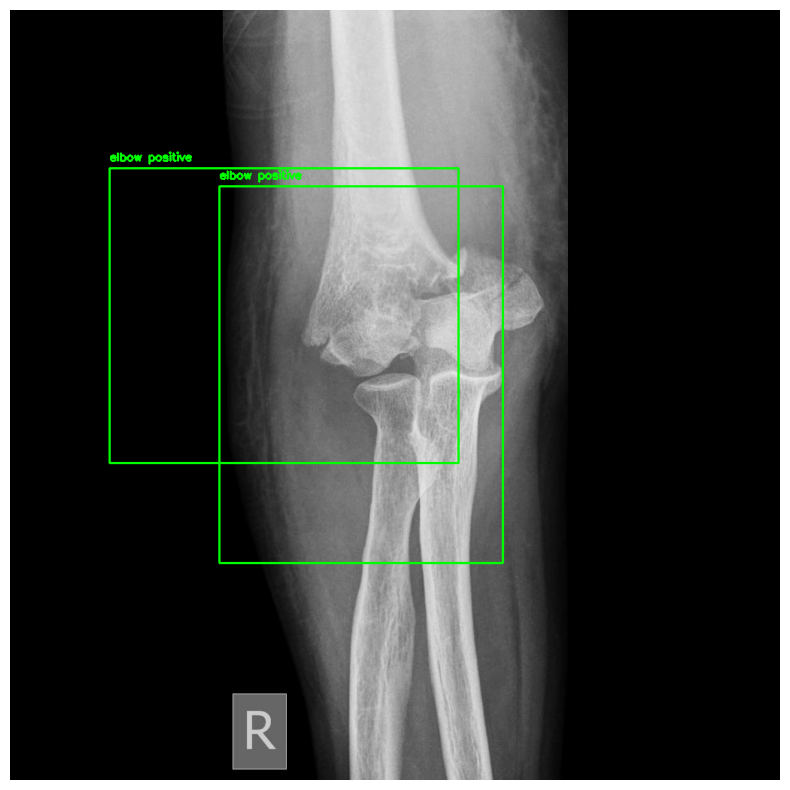

In [11]:
# Plot a sample image with bounding boxes
sample_image_path = "/kaggle/working/combined_dataset/images/train/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg"  
sample_label_path = "/kaggle/working/combined_dataset/labels/train/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.txt"
if os.path.exists(sample_image_path) and os.path.exists(sample_label_path):
    plot_image_with_bboxes(sample_image_path, sample_label_path, class_names)
else:
    print("Sample image or label file not found. Check the paths.")

In [12]:
def create_data_yaml(base_dir, class_names):
    data = {
        "train": f"{base_dir}/images/train",
        "val": f"{base_dir}/images/valid",
        "test": f"{base_dir}/images/test",
        "nc": len(class_names),
        "names": class_names,
    }
    yaml_path = f"{base_dir}/data.yaml"
    with open(yaml_path, "w") as yaml_file:
        yaml.dump(data, yaml_file, default_flow_style=False)
    print(f"`data.yaml` created at: {yaml_path}")



# Creating New Data.yaml

In [13]:

base_dir = "/kaggle/working/combined_dataset"
class_names = ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']
create_data_yaml(base_dir, class_names)

`data.yaml` created at: /kaggle/working/combined_dataset/data.yaml


In [14]:
yaml_file_path = '/kaggle/working/combined_dataset/data.yaml'

# Open and read the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.safe_load(file)

# Display the contents
print(yaml_content)

{'names': ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive'], 'nc': 7, 'test': '/kaggle/working/combined_dataset/images/test', 'train': '/kaggle/working/combined_dataset/images/train', 'val': '/kaggle/working/combined_dataset/images/valid'}


# Model Training

In [ ]:
model = YOLO("yolov8n.pt")

# Train the model on your dataset
results = tqdm(model.train(
    data="/kaggle/working/combined_dataset/data.yaml",
    epochs = 8,
    batch= 64,
    imgsz= 640,
    lr0= 0.005,
    lrf= 0.2,
    momentum= 0.937,
    weight_decay= 0.0005,
    warmup_epochs= 3,
    name="bone_fracture_detection"
))

Ultralytics 8.3.49 🚀 Python-3.10.15 torch-2.4.0+cu121 CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/combined_dataset/data.yaml, epochs=8, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=bone_fracture_detection6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T



train: Scanning /kaggle/working/combined_dataset/labels/train.cache... 3631 images, 1827 backgrounds, 147 corrupt: 100%|██████████| 3631/3631 [00:00<?, ?it/s]

train: WARNING ⚠️ /kaggle/working/combined_dataset/images/train/image1_1002_png.rf.1feafce607366113c97124dc22d52328.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [          6]
train: WARNING ⚠️ /kaggle/working/combined_dataset/images/train/image1_1002_png.rf.67c46c90c7089ef2ffa40b5fa22e4ad1.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [          6]
train: WARNING ⚠️ /kaggle/working/combined_dataset/images/train/image1_1002_png.rf.c94d11a79032d6beb4ce4d876c9f7fda.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [          6]
train: WARNING ⚠️ /kaggle/working/combined_dataset/images/train/image1_1022_png.rf.7129d1fd8b5572cdb3c96d1979908217.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [          2]
train: WARNING ⚠️ /kaggle/working/combined_dataset/images/train/image1_1022_png.rf.790daac7868bb104a1c5fd3642bcb389.jpg: ignoring corrupt image/label: non-normalize




val: Scanning /kaggle/working/combined_dataset/labels/valid.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]

Plotting labels to runs/detect/bone_fracture_detection6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/bone_fracture_detection6
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size




  0%|          | 0/55 [00:00<?, ?it/s]

        1/8         0G      3.176      4.797        3.2        176        640:   0%|          | 0/55 [00:12<?, ?it/s]

        1/8         0G      3.176      4.797        3.2        176        640:   2%|▏         | 1/55 [00:12<11:38, 12.94s/it]

        1/8         0G      3.051      4.754      3.109        160        640:   2%|▏         | 1/55 [00:24<11:38, 12.94s/it]

        1/8         0G      3.051      4.754      3.109        160        640:   4%|▎         | 2/55 [00:24<10:52, 12.31s/it]

        1/8         0G      2.935      4.678      3.031        180        640:   4%|▎         | 2/55 [00:36<10:52, 12.31s/it]

        1/8         0G      2.935      4.678      3.031        180        640:   5%|▌         | 3/55 [00:36<10:17, 11.88s/it]

        1/8         0G      2.881      4.664      2.988        173        640:   5%|▌         | 3/55 [00:48<10:17, 11.88s/it]

        1/8         0G      2.881      4.664      2.988        173        640

## Saving the model

In [16]:
model_path = "/kaggle/working/best_model.pt"
model.save(model_path)
print(f"Model saved to: {model_path}")

Model saved to: /kaggle/working/best_model.pt


# Model Evaluation

## mAP Score

In [18]:
metrics = model.val()
print(f"Validation mAP: {metrics}")

Ultralytics 8.3.49 🚀 Python-3.10.15 torch-2.4.0+cu121 CPU (Intel Xeon 2.00GHz)




val: Scanning /kaggle/working/combined_dataset/labels/valid.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/22 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▍         | 1/22 [00:00<00:08,  2.58it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   9%|▉         | 2/22 [00:00<00:08,  2.37it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▎        | 3/22 [00:01<00:08,  2.29it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  18%|█▊        | 4/22 [00:01<00:08,  2.22it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  23%|██▎       | 5/22 [00:02<00:07,  2.25it/s]

                 Class   

                   all        348        204      0.527    0.00833    0.00435   0.000528
        elbow positive         28         29          0          0          0          0
      fingers positive         41         48          1          0          0          0
      forearm fracture         37         43          0          0          0          0
               humerus         31         36          1          0    0.00164   0.000378
     shoulder fracture         19         20       0.16       0.05     0.0245    0.00279
        wrist positive         17         28          1          0          0          0
Speed: 0.3ms preprocess, 20.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/bone_fracture_detection3
Validation mAP: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78

# Visualisation

In [22]:
%load_ext tensorboard
%tensorboard --logdir=runs/train/bone_fracture_detection

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [21]:
!kill 340